In [ ]:
import torchvision
from torchvision import  transforms
import torch
from torch import no_grad

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def get_predictions(pred, threshold=0.8, objects=None):

    predicted_classes = [(COCO_INSTANCE_CATEGORY_NAMES[i], p.item(), [(box[0], box[1]), (box[2], box[3])]) for i, p, box in zip(list(pred[0]['labels'].numpy()), pred[0]['scores'].detach().numpy(), list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes = [stuff for stuff in predicted_classes if stuff[1] > threshold]

    if objects and predicted_classes:
        predicted_classes = [(name, p, box) for name, p, box in predicted_classes if name in objects]
    return predicted_classes


In [ ]:
def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):


    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:
        label = predicted_class[0]
        Accuracy = predicted_class[1]
        box = predicted_class[2]
        t = round(box[0][0].tolist())
        l = round(box[0][1].tolist())
        r = round(box[1][0].tolist())
        b = round(box[1][1].tolist())

        # Giving brief information about rectangle, class and probability.
        from colorama import Fore
        from colorama import Style
        print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
        print(f"Accuracy: {round(Accuracy * 100, 2)}%")  # Print as a percentage

        # Drawing rectangle and adding text on the picture based on their class and size.
        cv2.rectangle(image, (t, l), (r, b), (0, 255, 0), rect_th)
        cv2.rectangle(image, (t, l), (t + 110, l + 17), (255, 255, 255), -1)
        cv2.putText(image, label, (t + 10, l + 12), cv2.FONT_HERSHEY_SIMPLEX, text_size, (0, 255, 0), thickness=text_th)
        cv2.putText(image, label + ": " + str(round(Accuracy * 100, 2)) + "%", (t + 10, l + 12), cv2.FONT_HERSHEY_SIMPLEX, text_size, (0, 255, 0), thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if download_image:
        plt.savefig(f'{img_name}.png')
    else:
        pass
    plt.show()

    del img
    del image


## **Load the pre-trained model**

In [ ]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 265MB/s]


done


### **Dataset**

In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(COCO_INSTANCE_CATEGORY_NAMES)

91

# **Training**


# **Import image**

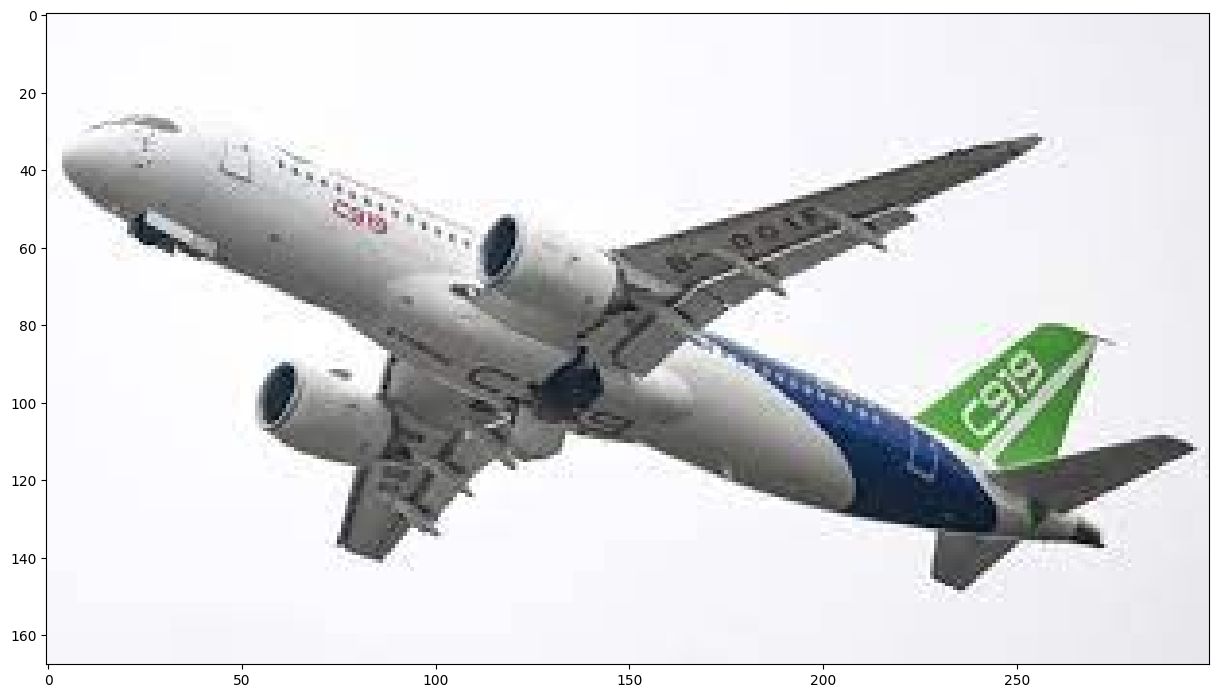

In [ ]:
img_path='/content/airplane.jpg'
half = 0.5
image = Image.open(img_path)

image.resize([int(half * s) for s in image.size] )
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.show()

 **We will create a transform object to convert the image to a tensor**

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
img = transform(image)

**We can make a prediction,The output is a dictionary with several predicted classes, the probability of belonging to that class and the coordinates of the bounding box corresponding to that class.**

In [ ]:
pred = model_([img])

In [ ]:
len(pred[0]['labels'])

16

In [ ]:
pred[0]['labels']

tensor([ 5,  5, 84,  1,  5,  5, 87, 90, 36, 75, 41, 36, 90,  5,  5,  5])

In [ ]:
pred[0]['scores']

tensor([0.9786, 0.4962, 0.3859, 0.2890, 0.2131, 0.1804, 0.1086, 0.1043, 0.0990,
        0.0772, 0.0764, 0.0724, 0.0662, 0.0537, 0.0530, 0.0510])

**The class number corresponds to the index of the list with the corresponding category name.**

In [ ]:
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'airplane'

In [ ]:
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box

[8.086050033569336, 22.495798110961914, 270.7463073730469, 139.44595336914062]

**These components correspond to the top-left corner and bottom-right corner of the rectangle, more precisely: top(t), left(l), bottom(b), right(r).**

In [ ]:
t, l, r, b = [round(x) for x in bounding_box]
print(t, l, r, b)

8 22 271 139



Label: airplane
Accuracy: 97.86%


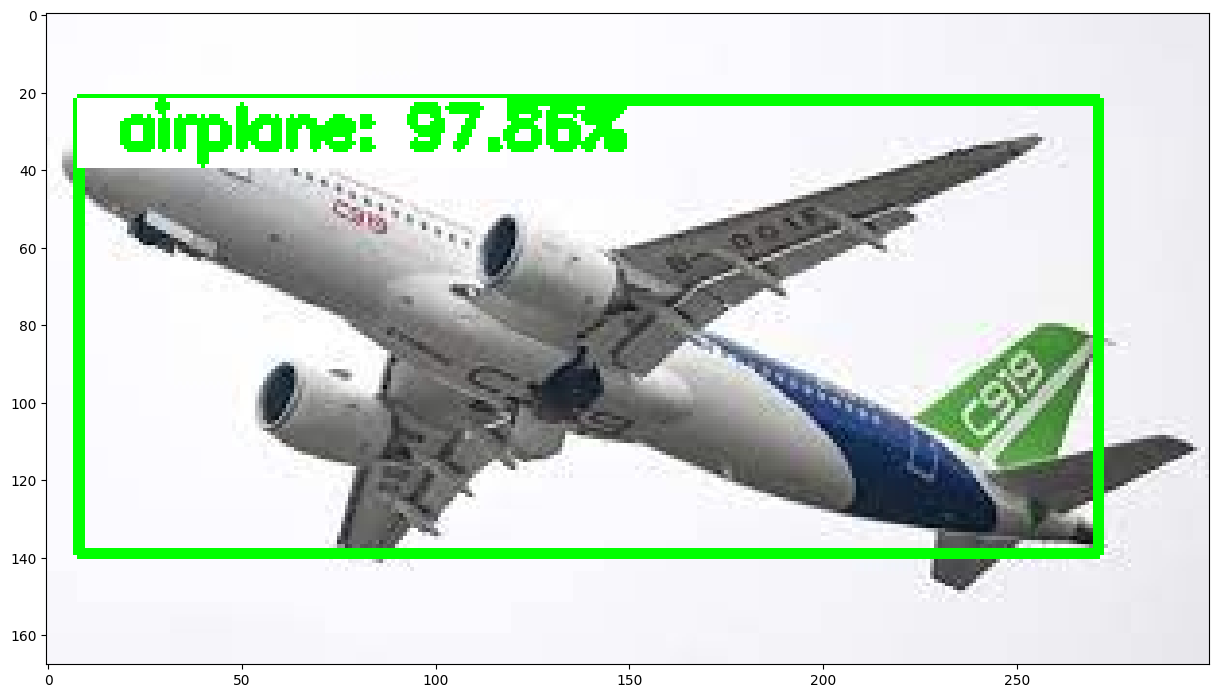

In [ ]:
pred_class=get_predictions(pred, objects="airplane")
draw_box(pred_class, img)



In [ ]:
!pip install colorama

# **For Train image**

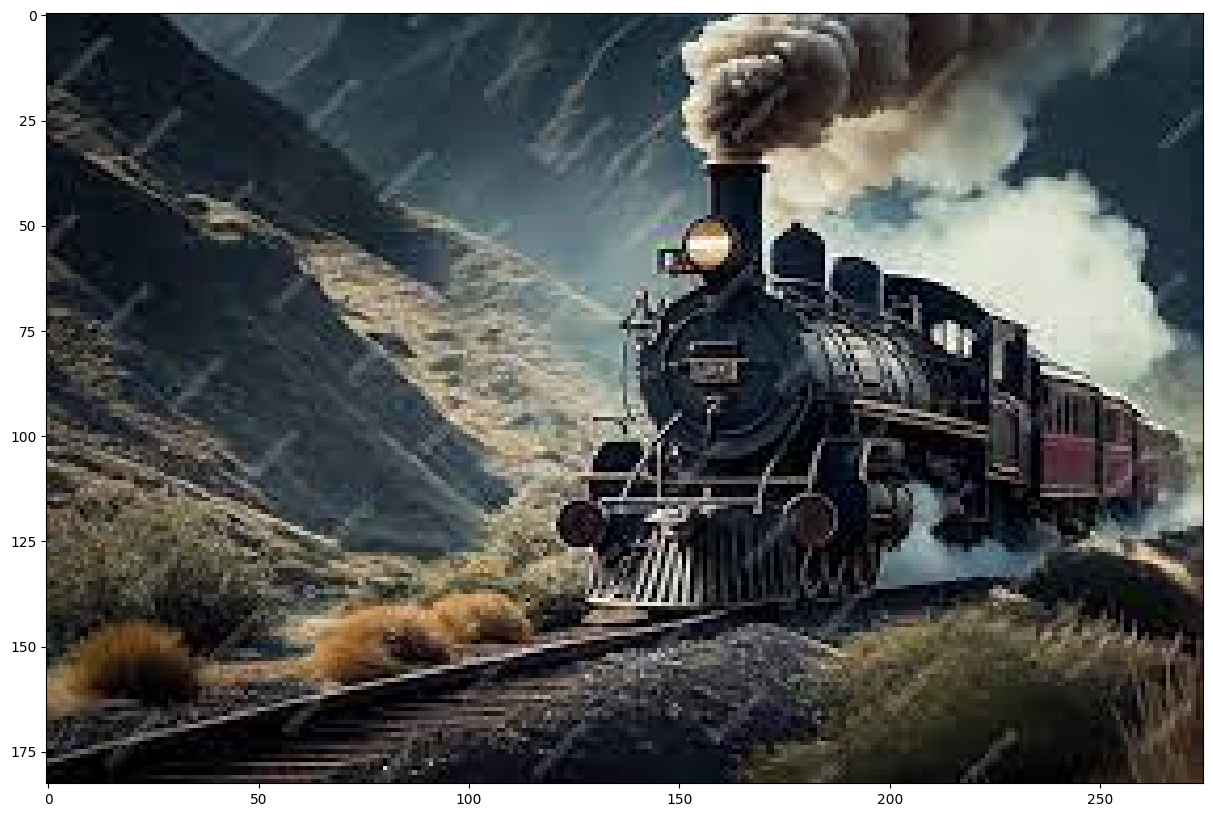

In [ ]:
train_img_path='/content/train.jpg'
half = 0.5
image = Image.open(train_img_path)

image.resize([int(half * s) for s in image.size] )
plt.figure(figsize=(15, 10))
plt.imshow(image)
plt.show()

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
img = transform(image)
pred = model_([img])
len(pred[0]['labels'])
pred[0]['labels']
pred[0]['scores']
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]


'train'


Label: train
Accuracy: 99.5%


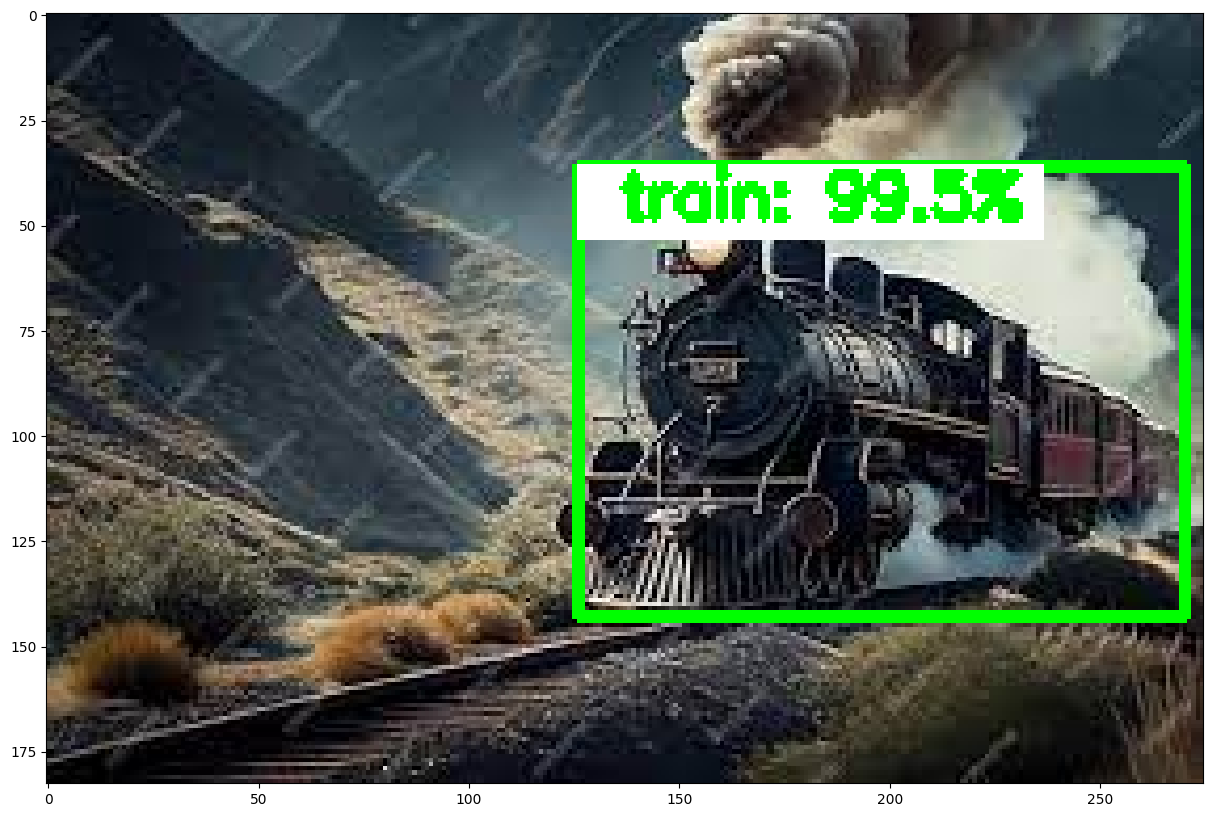

In [ ]:
pred_class=get_predictions(pred, objects="train")
draw_box(pred_class, img)

## **Testing**

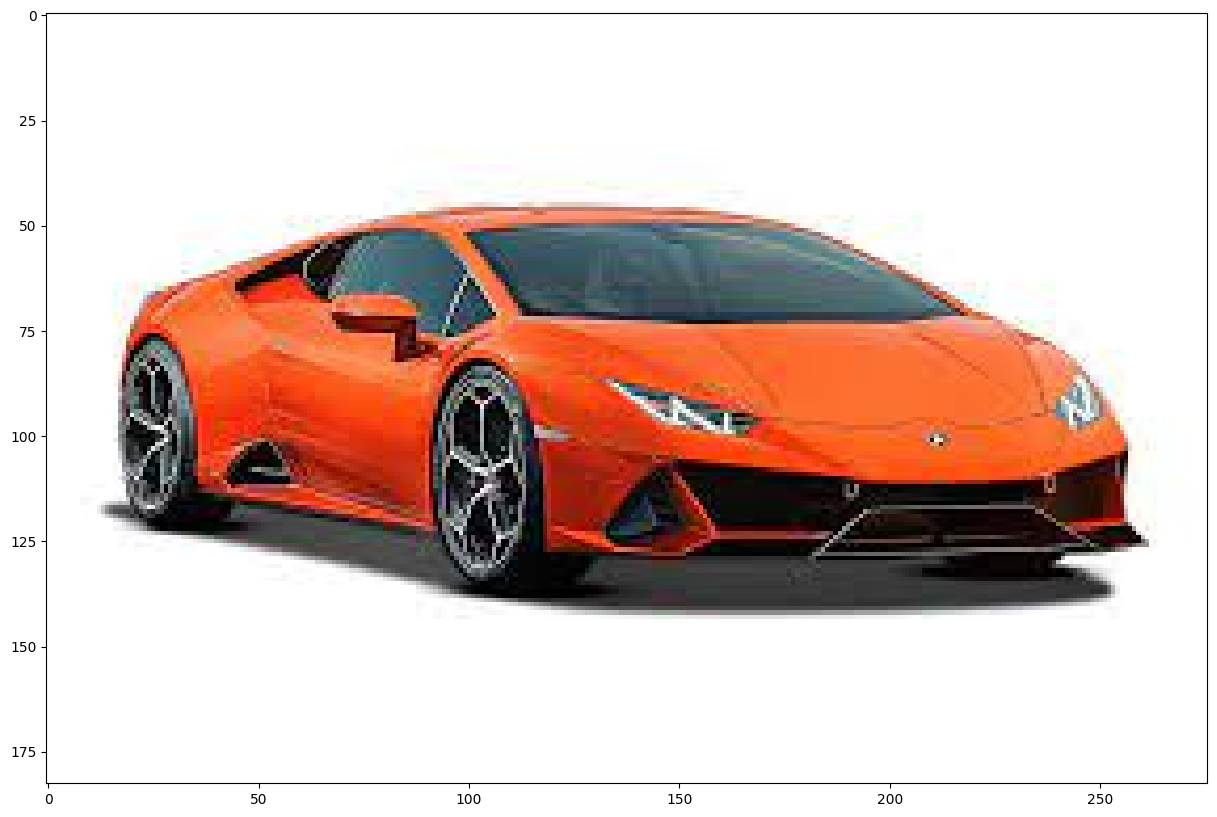

In [ ]:
car_img_path='/content/car.jpg'
image = Image.open(car_img_path)
image.resize([int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()


Label: car
Accuracy: 93.5%


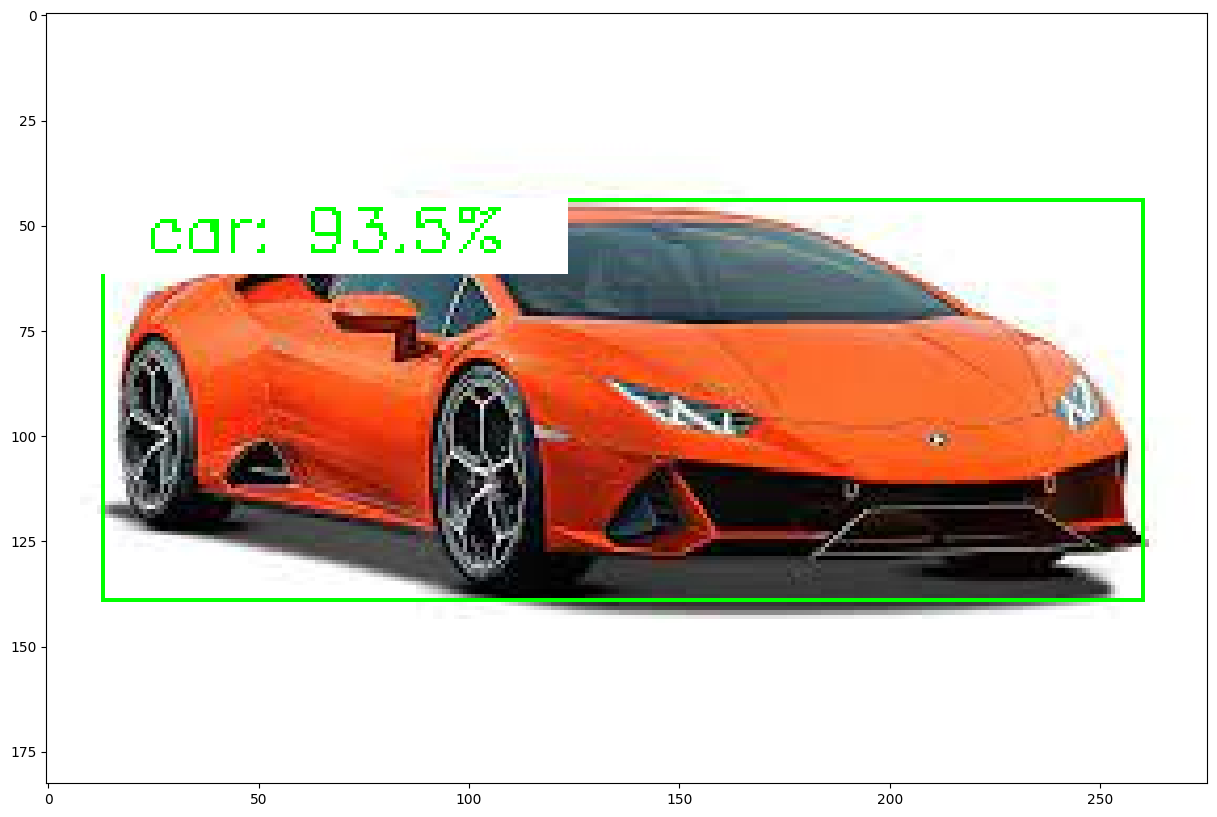

13 44 260 139


In [ ]:
car_img = transform(image)
pred = model_([car_img])
pred_thresh=get_predictions(pred, threshold=0.8)
draw_box(pred_thresh, car_img, rect_th=1, text_size= 0.5, text_th=1)
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box
t, l, r, b = [round(x) for x in bounding_box]
print(t, l, r, b)


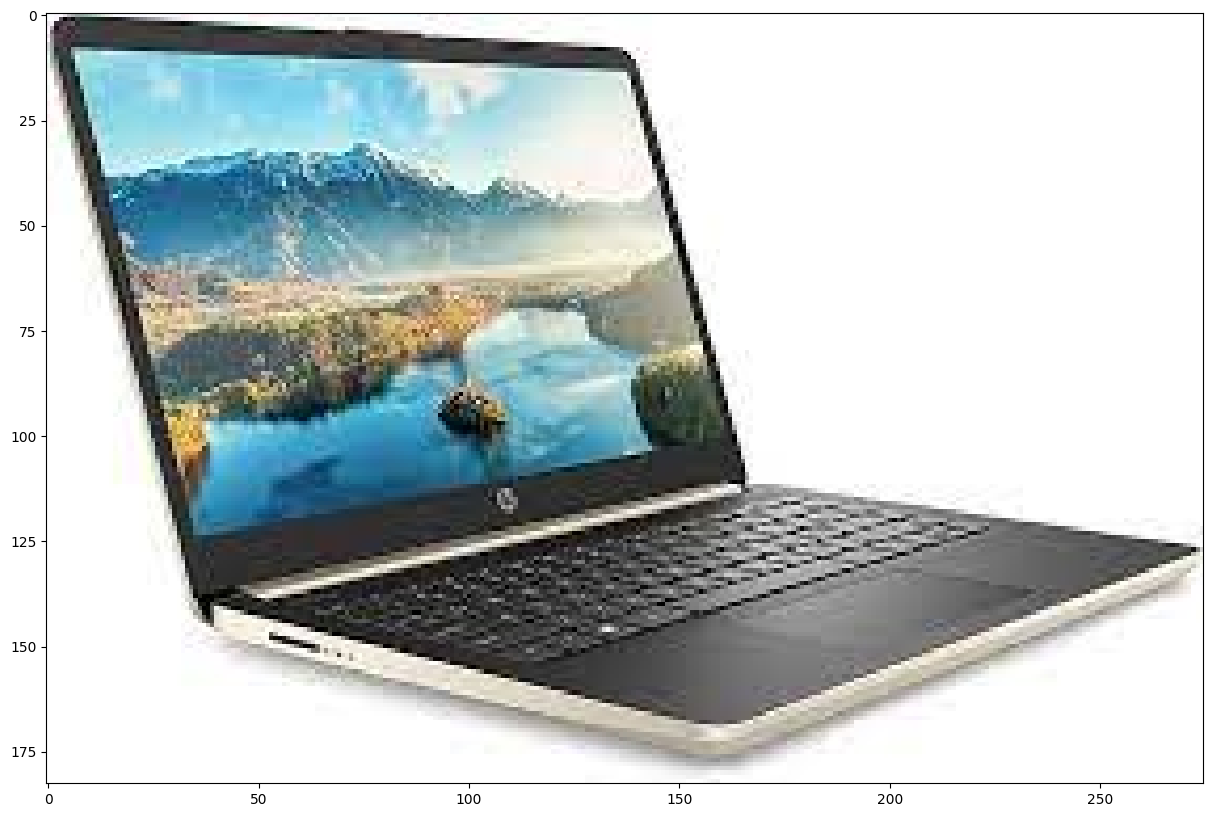

In [ ]:
laptop_img_path='/content/laptop.jpg'
image = Image.open(laptop_img_path)
image.resize([int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()


Label: laptop
Accuracy: 86.07%


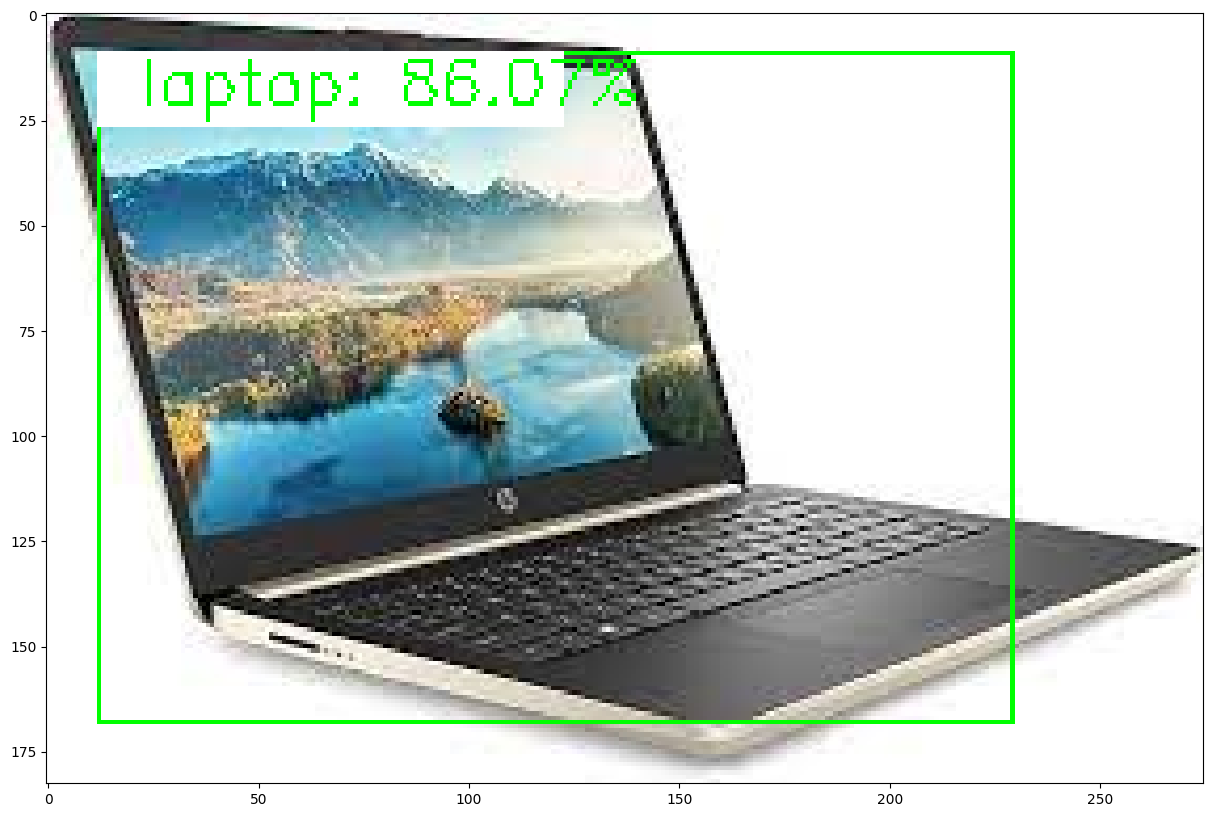

12 9 229 168


In [ ]:
laptop_img = transform(image)
pred = model_([laptop_img])
pred_thresh=get_predictions(pred, threshold=0.8)
draw_box(pred_thresh, laptop_img, rect_th=1, text_size= 0.5, text_th=1)
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box
t, l, r, b = [round(x) for x in bounding_box]
print(t, l, r, b)


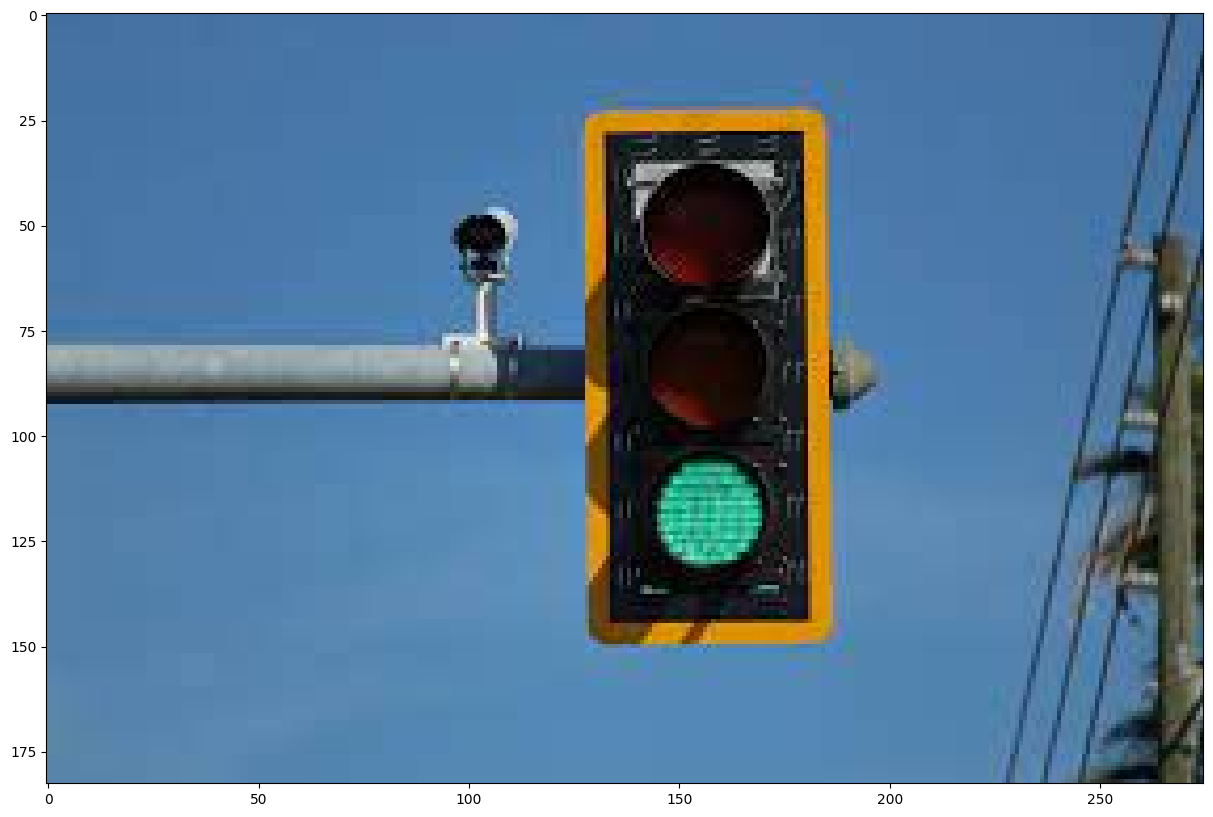

In [ ]:
traffic_img_path='/content/traffic_light.jpg'
image = Image.open(traffic_img_path)
image.resize([int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()


Label: traffic light
Accuracy: 99.69%


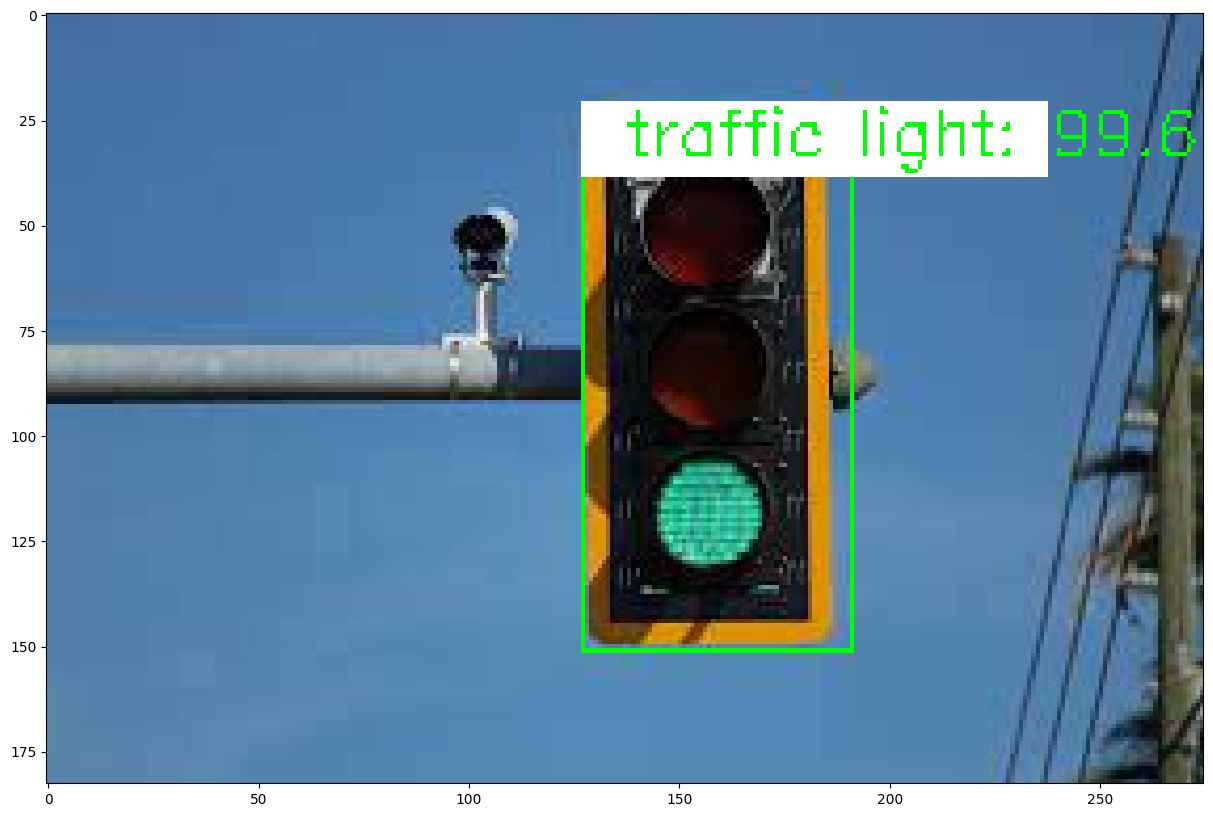

127 21 191 151


In [ ]:
traffic_img = transform(image)
pred = model_([traffic_img])
pred_thresh=get_predictions(pred, threshold=0.8)
draw_box(pred_thresh, traffic_img, rect_th=1, text_size= 0.5, text_th=1)
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box
t, l, r, b = [round(x) for x in bounding_box]
print(t, l, r, b)


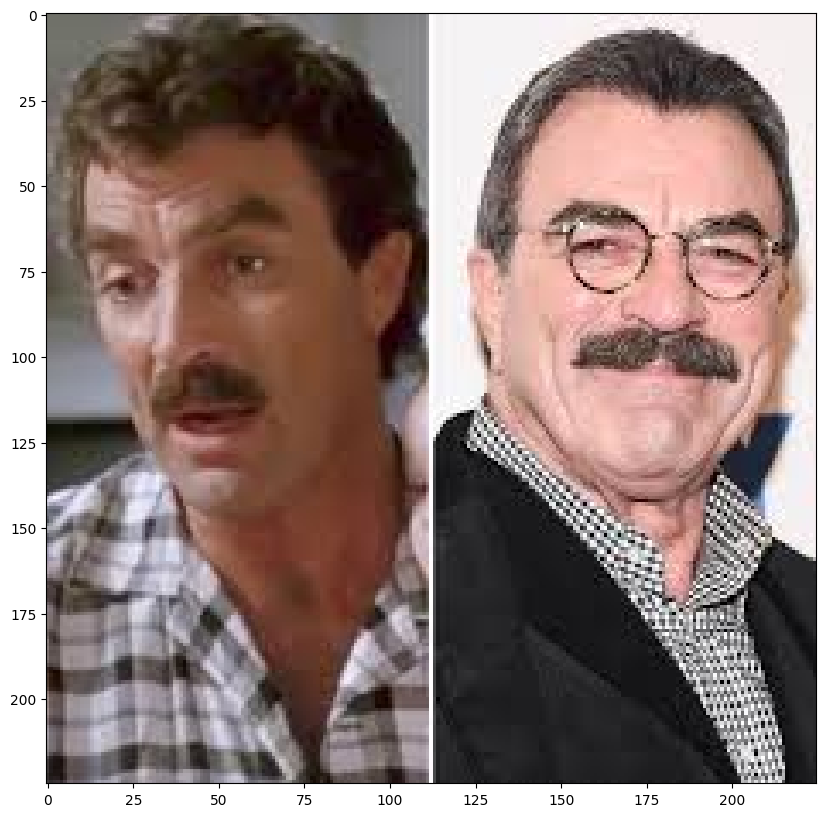

In [ ]:
persons_img_path='/content/persons.jpg'
image = Image.open(persons_img_path)
image.resize([int(half * s) for s in image.size])
plt.figure(figsize=(15, 10))
plt.imshow(np.array(image))
plt.show()


Label: person
Accuracy: 99.53%

Label: person
Accuracy: 99.39%


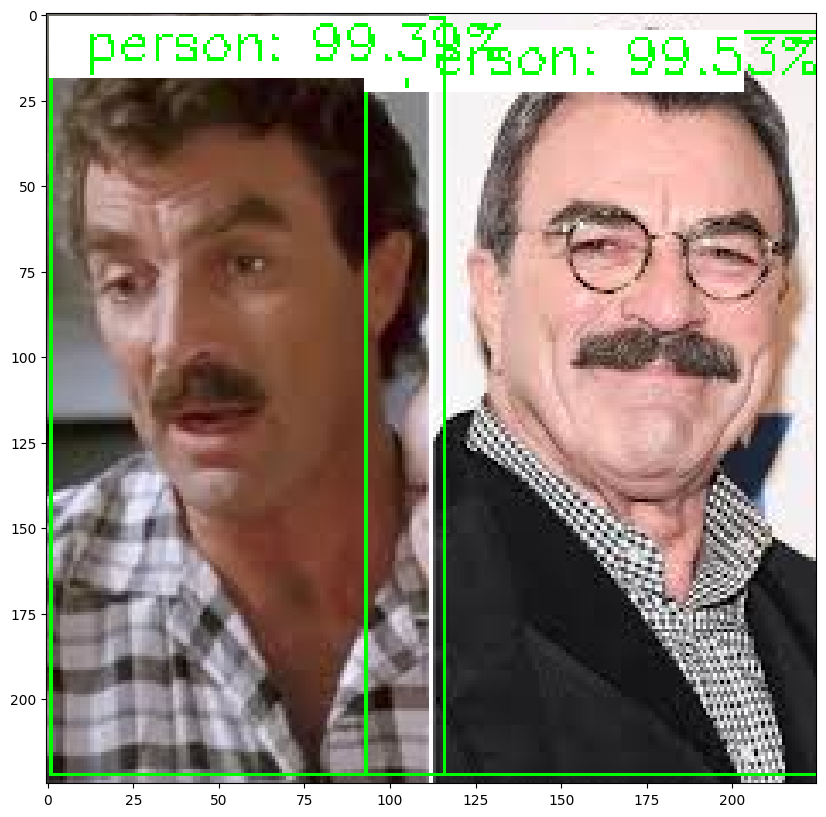

93 5 225 222


In [ ]:
persons_img= transform(image)
pred = model_([persons_img])
pred_thresh=get_predictions(pred, threshold=0.8)
draw_box(pred_thresh, persons_img, rect_th=1, text_size= 0.5, text_th=1)
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box
t, l, r, b = [round(x) for x in bounding_box]
print(t, l, r, b)
